In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [2]:
cal1 = np.loadtxt("data/simple/calibracion_1ms.dat")
cal2 = np.loadtxt("data/simple/calibracion_2ms.dat")
cal5 = np.loadtxt("data/simple/calibracion_5ms.dat")
rabi = np.loadtxt("data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat")

### Graficamos los datos de calibración

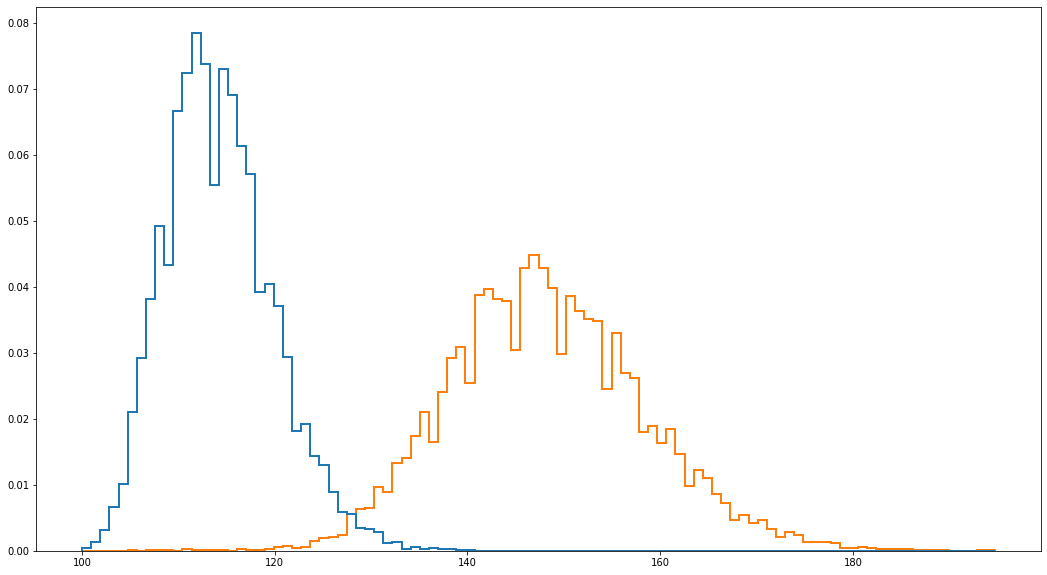

In [10]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal1, bins=100, histtype="step", linewidth=2, density=True)
plt.show()

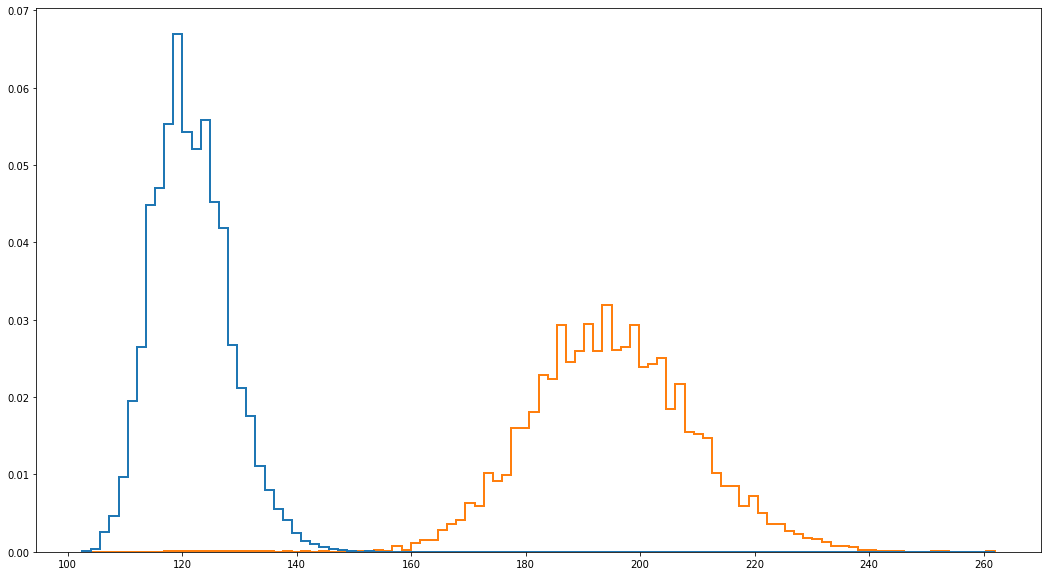

In [11]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

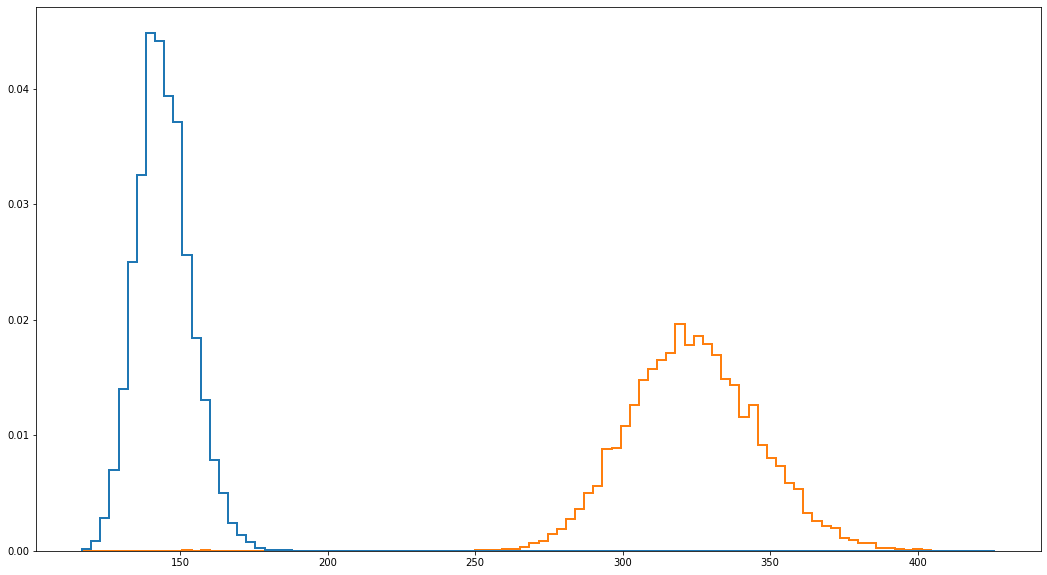

In [12]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.hist(cal5, bins=100, histtype="step", linewidth=2, density=True)
plt.show()

### Defino dist de Poisson y factorial

In [101]:
def factorial(arr):
    salida = np.ones(arr.shape[0])
    for index, num in enumerate(arr):
        for i in range(1, num+1):
            salida[index] *= i
    return salida

def poisson_mio(datos, lmb):
    num =  np.exp(-lmb) * lmb**datos
    den = factorial(datos)
    return num/den



# Fitteamos Poisson a mano para la calibración 5

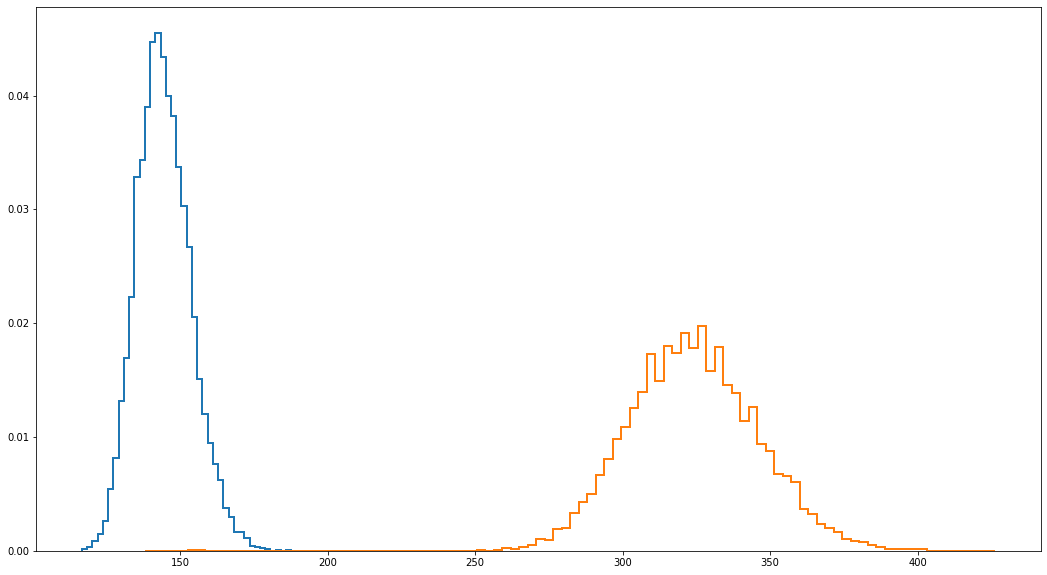

In [77]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
n0, bins0, patches0 = ax.hist(cal5[:,0], bins=40, histtype="step", linewidth=2, density = True)
n1, bins1, patches1 = ax.hist(cal5[:,1], bins=100, histtype="step", linewidth=2, density=True)
plt.show()

1.0


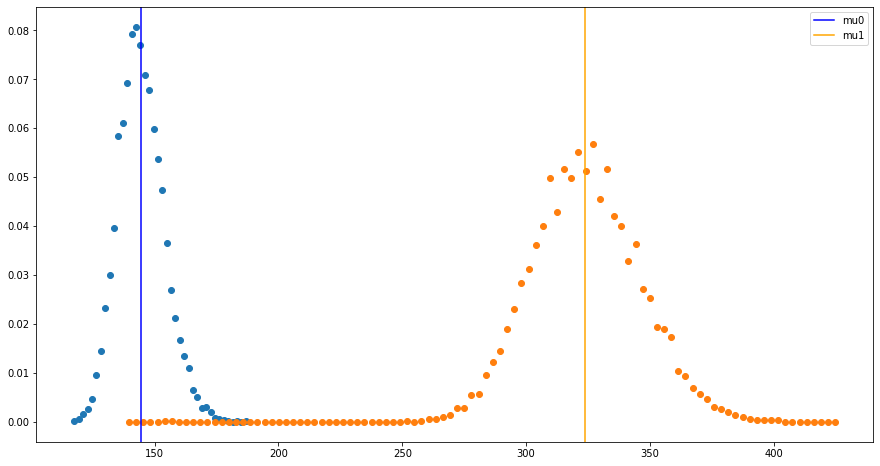

In [91]:
x0 = bins0[:-1] + np.diff(bins0)/2
x1 = bins1[:-1] + np.diff(bins1)/2
y0 = n0*np.diff(bins0)
y1 = n1*np.diff(bins1)

print(np.sum(n0*np.diff(bins0)))
#print(sum(y0), sum(y1))
mu0 = np.sum(x0*y0)
mu1 = np.sum(x1*y1)



fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x0, y0, 'o')
plt.plot(x1, y1, 'o')
plt.axvline(mu0, color="blue",label="mu0")
plt.axvline(mu1, color="orange",label="mu1")
plt.legend()
plt.show()

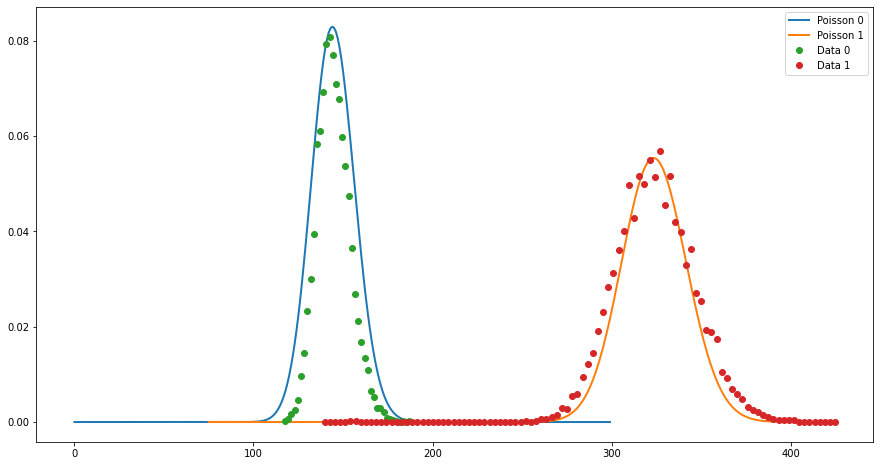

(144.57561, 323.853328)

In [90]:
#%matplotlib widget


x_poisson0 = np.arange(0, 300, 1, dtype=int)
x_poisson1 = np.arange(75, 400, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)
scale_x = 1
offset = 0

fig, ax = plt.subplots(1, figsize=(15,8),facecolor = 'w')

ax.plot(x_poisson0, poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)
ax.plot()

ax.plot((x0-offset)*scale_x , y0, 'o', label="Data 0")
ax.plot((x1-offset)*scale_x, y1, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion5.png')
plt.show()
mu0, mu1

# Fitteamos Poisson a mano para la medición 2

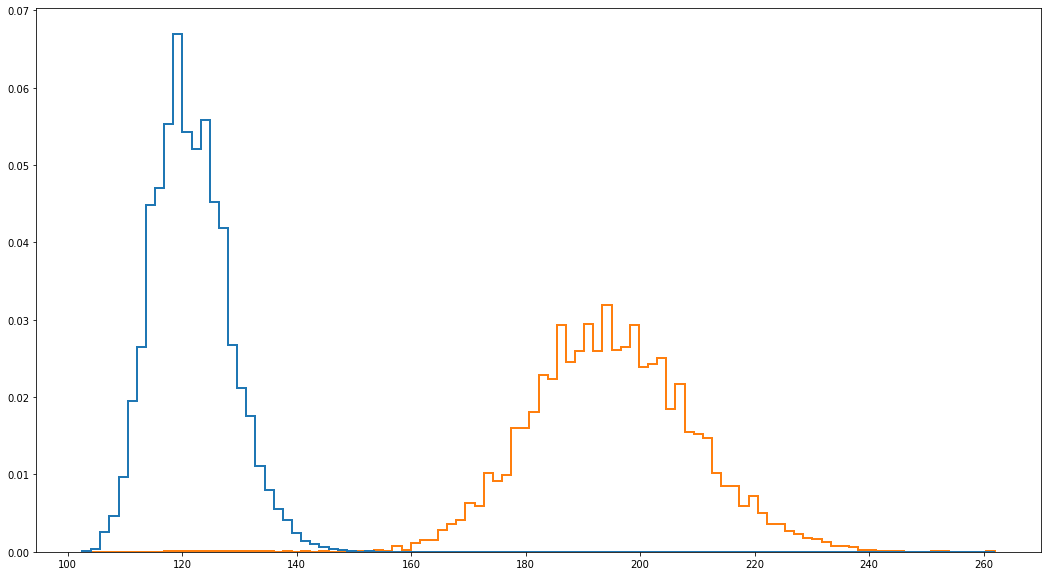

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal2, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

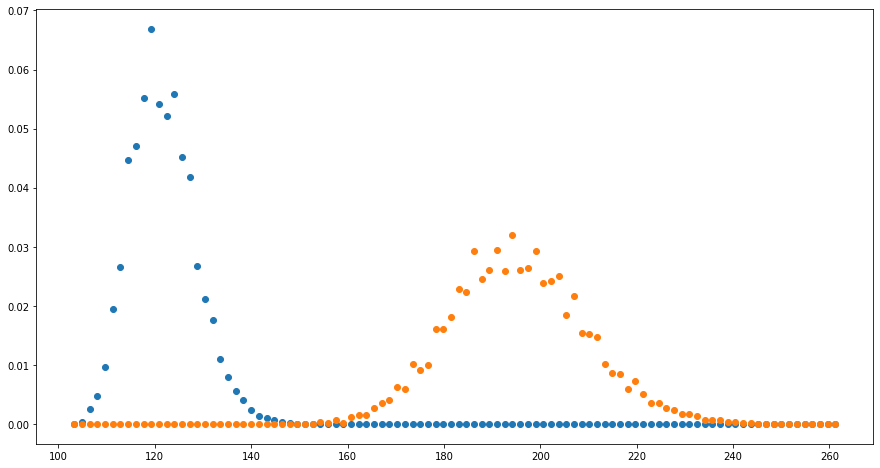

In [12]:
x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1

fig, ax = plt.subplots(1, figsize=(15,8))
plt.plot(x, y0, 'o')
plt.plot(x, y1, 'o')
plt.show()

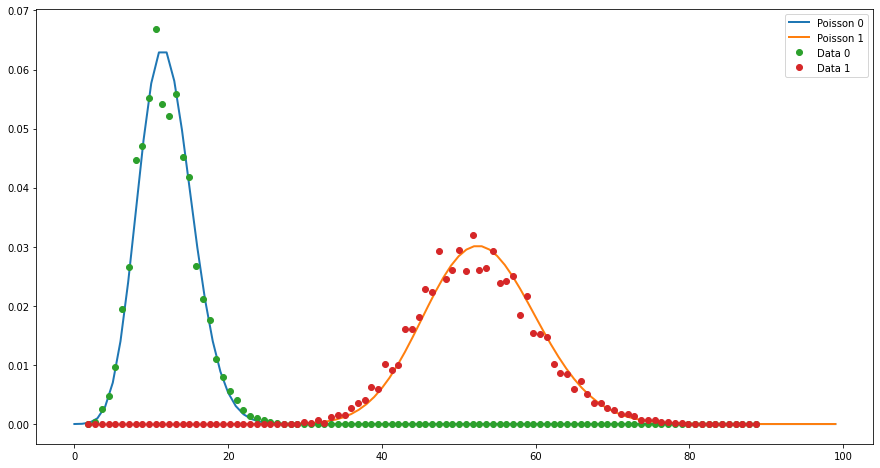

In [13]:
mu0 = 12
mu1 = 53
x_poisson0 = np.arange(0, 100, 1, dtype=int)
x_poisson1 = np.arange(20, 100, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
# sum1 = 0
# sum2 = 0
# for i in range(len(n0)):
#     sum1 += n0[i]*np.diff(bins)[i]
#     sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2
escala_y =1
scale_y = 1
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0/escala_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/escala_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()


# Ajuste de calibración 1

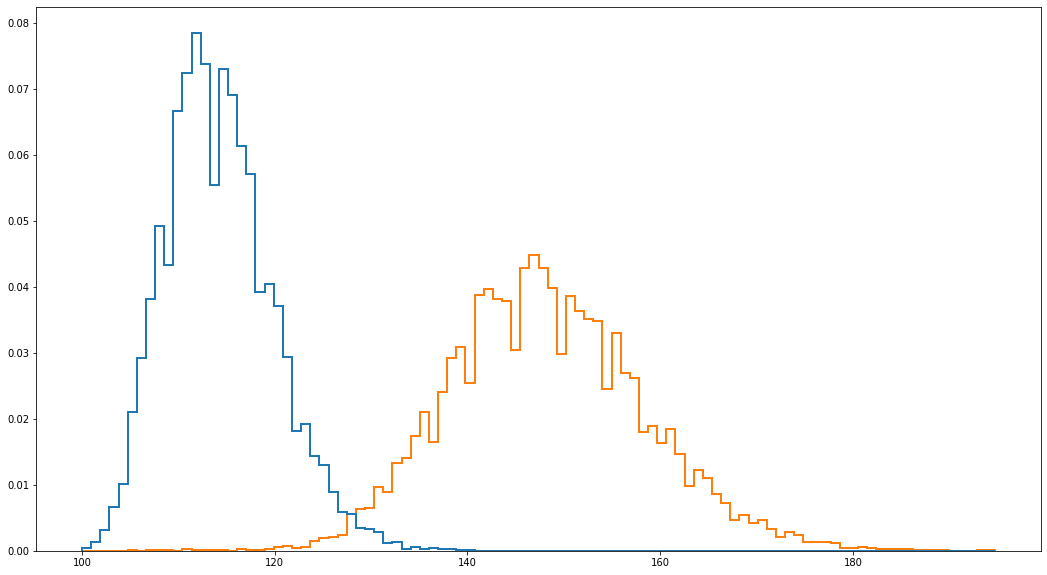

In [14]:
fig, ax = plt.subplots(1, figsize=(18,10))
(n0, n1), bins, patches = ax.hist(cal1, bins=100, histtype="step", linewidth=2, density = True)
plt.show()

x = bins[:-1] + np.diff(bins)/2
y0 = n0
y1 = n1


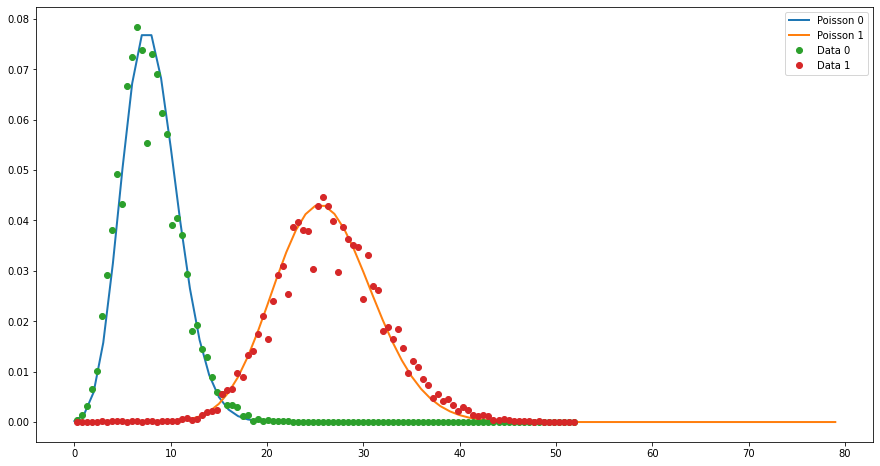

In [15]:
mu0 = 8
mu1 = 26
x_poisson0 = np.arange(0, 32, 1, dtype=int)
x_poisson1 = np.arange(10, 80, 1, dtype=int)
#mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

#offset = min(x)-10
sum1 = 0
sum2 = 0
for i in range(len(n0)):
    sum1 += n0[i]*np.diff(bins)[i]
    sum2 += n1[i]*np.diff(bins)[i]

#escala_y = sum1+sum2
escala_y = 1
scale_y = escala_y
scale_x = 0.55
offset = 100

fig, ax = plt.subplots(1, figsize=(15,8), facecolor ='white')

ax.plot(x_poisson0, 0.55*poisson.pmf(x_poisson0, mu0), ms=8, label='Poisson 0', linewidth=2)
ax.plot(x_poisson1, 0.55*poisson.pmf(x_poisson1, mu1), ms=8, label="Poisson 1", linewidth=2)

ax.plot((x-offset)*scale_x, y0/escala_y, 'o', label="Data 0")
ax.plot((x-offset)*scale_x, y1/escala_y, 'o', label="Data 1")

plt.legend()
#plt.savefig('calibracion2.png')
plt.show()

# Histograma todos los graficos y valores medios

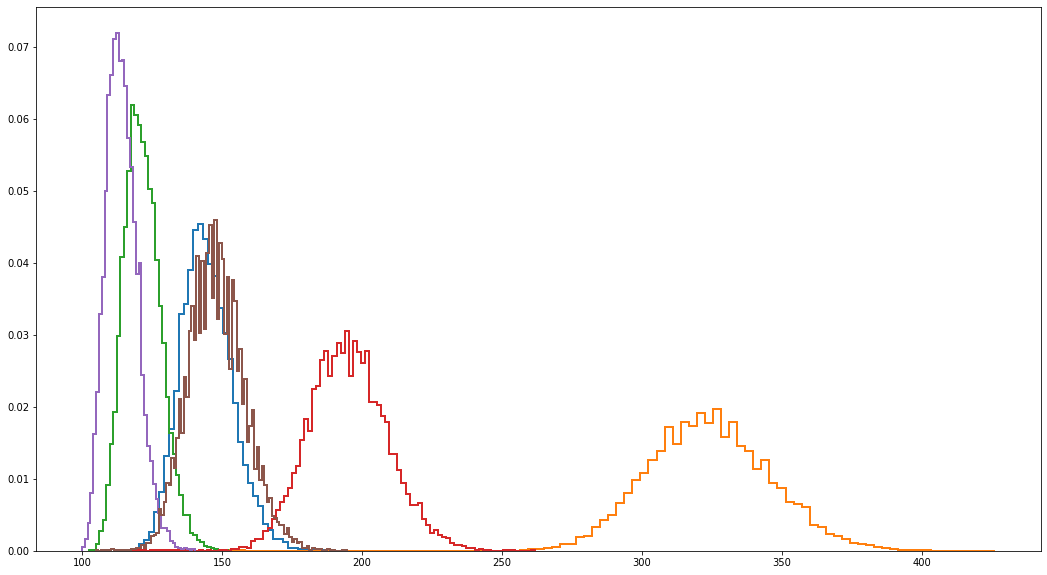

In [3]:
m50 = cal5[:,0]
m51 = cal5[:,1]
m20 = cal2[:,0]
m21 = cal2[:,1]
m10 = cal1[:,0]
m11 = cal1[:,1]


%matplotlib inline

fig, ax = plt.subplots(1, figsize=(18,10))

n50, bins50, patches50 = ax.hist(cal5[:,0], bins=40, histtype="step", linewidth=2, density = True)
n51, bins51, patches51 = ax.hist(cal5[:,1], bins=100, histtype="step", linewidth=2, density=True)

n20, bins20, patches20 = ax.hist(cal2[:,0], bins=40, histtype="step", linewidth=2, density = True)
n21, bins21, patches21 = ax.hist(cal2[:,1], bins=100, histtype="step", linewidth=2, density=True)

n10, bins10, patches10 = ax.hist(cal1[:,0], bins=40, histtype="step", linewidth=2, density = True)
n11, bins11, patches11 = ax.hist(cal1[:,1], bins=100, histtype="step", linewidth=2, density=True)


x50 = bins50[:-1] + np.diff(bins50)/2
x51 = bins51[:-1] + np.diff(bins51)/2
x20 = bins20[:-1] + np.diff(bins20)/2
x21 = bins21[:-1] + np.diff(bins21)/2
x10 = bins10[:-1] + np.diff(bins10)/2
x11 = bins11[:-1] + np.diff(bins11)/2

y50 = n50*np.diff(bins50)
y51 = n51*np.diff(bins51)
y20 = n20*np.diff(bins20)
y21 = n21*np.diff(bins21)
y10 = n10*np.diff(bins10)
y11 = n11*np.diff(bins11)

mu50 = np.sum(x50*y50)
mu51 = np.sum(x51*y51)
mu20 = np.sum(x20*y20)
mu21 = np.sum(x21*y21)
mu10 = np.sum(x10*y10)
mu11 = np.sum(x11*y11)

plt.show()

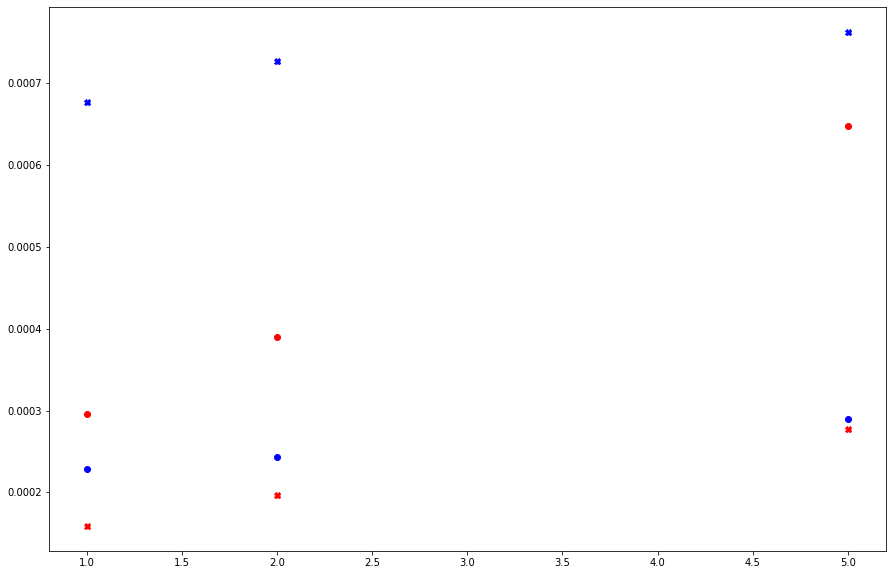

In [39]:
%matplotlib inline

t = [1, 2, 5]
mus0 = np.array([mu10, mu20, mu50])
mus1 = np.array([mu11, mu21, mu51])
varianzas0 =  np.array([np.var(y10), np.var(y20), np.var(y50)])
varianzas1 =  np.array([np.var(y11), np.var(y21), np.var(y51)])

escala = 0.000002
offset = 50

plt.figure(figsize=(15,10))
plt.plot(t, escala*mus0, 'ob')
plt.plot(t, escala*mus1, 'or')
plt.plot(t, varianzas0, 'Xb')
plt.plot(t, varianzas1, "Xr")
plt.show()

Vemos que la cantidad de cuentas promedio es lineal con el tiempo de exposición de la cámara. Queremos que la cantidad de cuentas de la cámara sea igual a la cantidad de fotones que mide la cámara. La cámara puede tener un offset y un factor de escala.
El factor de escala lo que hace es multiplicar cada cuenta de un foton por un factor $\epsilon$, entonces si a la cámara entran $n$ fotones, la cantidad de cuentas que vamos a medir es $x=n\epsilon$. 
Otra cosa que puede pasar es que haya un ruido constante por el instrumento o luz externa o etc, y eso lo que hace es agregar un offset $k$ a la medición, es decir, si a la cámara entran $n$ fotones, nosotros vamos a medir $x=n+k$ cuentas.

Si tenemos en cuenta ambos fenómenos entonces la cantidad de cuentas en función de los fotones es
$$x = n\epsilon+k$$
Entonces, despejando $n$ de esta ecuación queda que la cantidad de fotones que entran a la cámara son 
$$n = \frac{1}{\epsilon}(x-k).$$
Redefiniendo
$$n = a  x - b$$ 

Entoces. Sabemos que la probabildad de que el átomo emita un foton sigue una distribución poissoneana que depende de si el fotón está apagado o prendido, entonces la probabilidad de que el átomo emita $k$ fotones es 
$$P(k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

Entonces, nosotros tenemos $P(x)$, es decir, la probabilidad de medir $x$ cuentas y queremos obtener $P(n)$, o sea, la probabilidad de medir $n$ fotones. Entonces, la probabilidad debería ser la siguiente
$$P(n) = \frac{e^{-\lambda} \lambda^n}{n!} = \frac{e^{-\lambda} \lambda^{a  x - b}}{(a  x - b)!}$$

Entonces probamos hacer esto con un solo histograma, por ejemplo con el de cal5[:,1]

426.25 138.25 288.0
1.0 0.9999999994849912


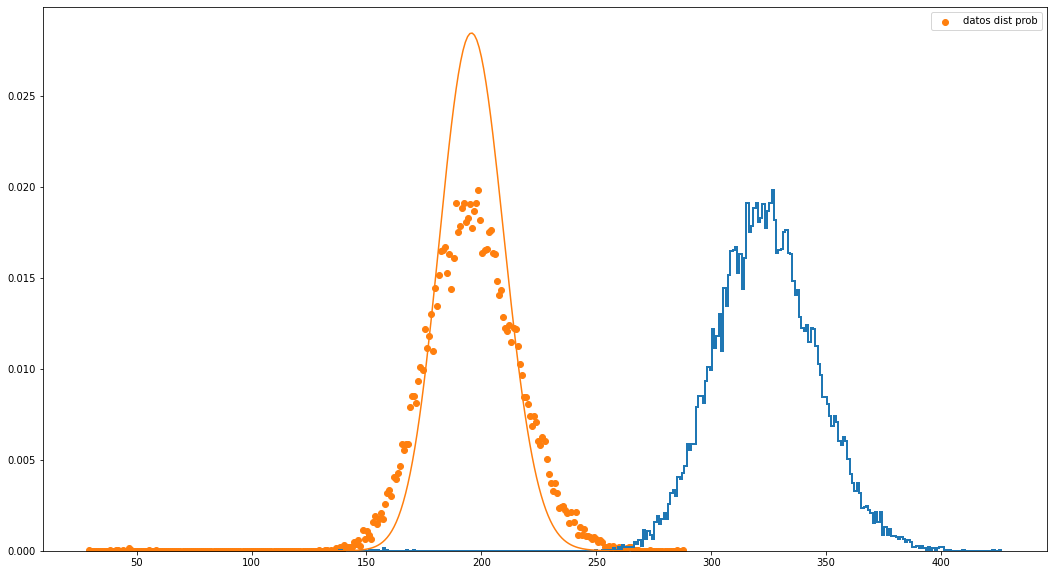

In [50]:
m51 = cal5[:,1]



fig, ax = plt.subplots(1, figsize=(18,10))

print(max(m51), min(m51), max(m51) - min(m51))
n51, bins51, patches51 = ax.hist(cal5[:,1], bins=288, histtype="step", linewidth=2, density=True)

offset = 106
escala = 0.9

binwidth = np.diff(bins51)[0]

x51 = bins51[:-1] + binwidth/2
x51 = (x51 - offset)*escala
y51 = n51*binwidth
mu51 = np.sum(x51*y51)

ax.scatter(x51, y51, label="datos dist prob")

x_pois = np.arange(min(x51), max(x51), 1 , dtype=int)

plt.plot(x_pois, poisson.pmf(x_pois, mu51))

print(np.sum(y51), np.sum(poisson.pmf(x_pois, mu51)))

ax.legend()
plt.show()

Intentamos hacer lo mismo, pero ahora como lo hizo Lean. Sabemos que para una distribución Poissoneana, el valor medio $\mu$ y la varianza $\sigma^2$ se relaciónan de la forma
$$ \sigma^2 = \sqrt{\mu}$$
Ahora, en nuestro caso tenemos $x = \varepsilon n + k$ y sabemos que debería ser cierto que $\sigma^2_n = \sqrt{\mu_n}$ y
$$\sigma^2_n = \sigma^2_{ax-b} \newline$$
$$\sqrt{\mu_n} = \sqrt{\mu_{ax-b}}$$

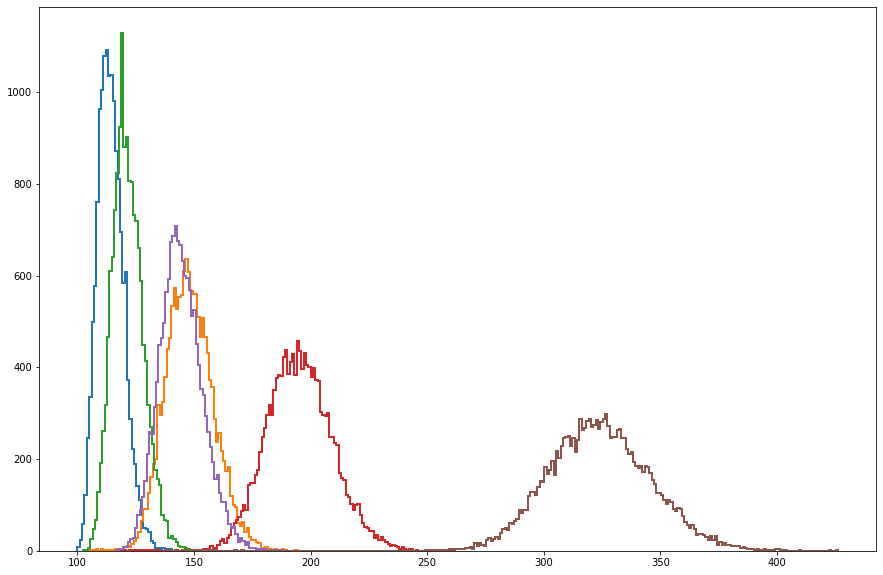

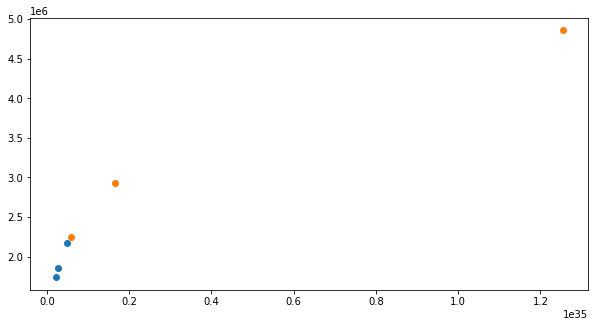

In [57]:
promedios0 = []
promedios1 = []
stds0 = []
stds1 = []
ns0 = []
ns1 = []
bins0 = []
bins1 = []
patches0 = []
patches1 = []
binwidths0 = []
binwidths1 = []


cals = [cal1, cal2, cal5]

fig, ax = plt.subplots(1, figsize=(15,10))

for cal in cals:
    apagado = cal[:,0]
    prendido = cal[:,1]
    bins_apagado = int(max(apagado)- min(apagado))
    bins_prendido = int(max(prendido)- min(prendido))
    
    n0, bin0, patch0 = ax.hist(apagado, bins=bins_apagado, histtype="step", linewidth=2, density=False)
    n1, bin1, patch1 = ax.hist(prendido, bins=bins_prendido, histtype="step", linewidth=2, density=False)
    binwidth0 = np.diff(bin0)[0]
    binwidth1 = np.diff(bin1)[0]
    
    binwidths0.append(binwidth0)
    binwidths1.append(binwidth1)
    ns0.append(n0)
    ns1.append(n1)
    bins0.append(bin0)
    bins1.append(bin1)
    patches0.append(patch0)
    patches1.append(patch1)
    
    x0 = bin0[:-1] + binwidth0/2
    x1 = bin1[:-1] + binwidth1/2
    
    y0 = n0*binwidth0
    y1 = n1*binwidth1
    
    mu0 = np.sum(x0*y0)
    mu1 = np.sum(x1*y1)
    
    promedios0.append(mu0)
    promedios1.append(mu1)
    
    std0 = np.sum((x0-mu0)**2 * y0)
    std1 = np.sum((x1-mu1)**2 * y1)
    
    stds0.append(std0)
    stds1.append(std1)

plt.show()


plt.figure(1, figsize=(10,5))
plt.plot(np.array(stds0)**2, promedios0, 'o')
plt.plot(np.array(stds1)**2, promedios1, 'o')
plt.show()

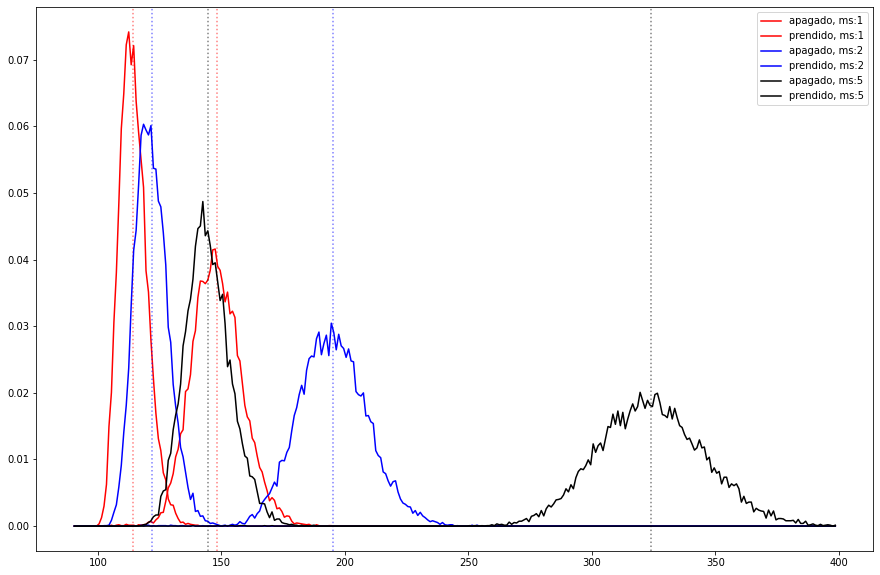

In [4]:
meds0 = np.array([cal1[:,0], cal2[:,0], cal5[:,0]])
meds1 = np.array([cal1[:,1], cal2[:,1], cal5[:,1]])

offset = 0
escala = 1

hists0 = []
hists1 = []

colores = ["r", "b", "k"]
tiempos = ["1", "2", "5"]

proms0 = []
proms1 = []
vars0 = []
vars1 = []

plt.figure(figsize=(15,10))
for i in range(len(meds0)):
    med0 = meds0[i]
    med1 = meds1[i]
    
    hist0, bin_edges0 = np.histogram(med0, bins=np.arange(90,400,1,dtype=int), density=True)
    hist1, bin_edges1 = np.histogram(med1, bins=np.arange(90,400,1,dtype=int), density=True)
    
    color = colores[i]
    tiempo = tiempos[i]
    
    hists0.append(hist0)
    hists1.append(hist1)
    
    x0 = bin_edges0[:-1]+0.5
    x1 = bin_edges1[:-1]+0.5
    
    prom0 = np.sum(x0*hist0)
    prom1 = np.sum(x1*hist1)
    
    var0 = np.sum(hist0 * (x0 - prom0)**2)
    var1 = np.sum(hist1 * (x1 - prom1)**2)
    
    vars0.append(var0)
    vars1.append(var1)
    
    proms0.append(prom0)
    proms1.append(prom1)
    
    plt.axvline(prom0, color=color, alpha=0.5, linestyle="dotted")
    plt.axvline(prom1, color=color, alpha=0.5, linestyle="dotted")
    plt.plot(x0,hist0, color=color, label="apagado, ms:"+tiempo)
    plt.plot(x1 ,hist1, color=color, label="prendido, ms:"+tiempo)
    
plt.legend()
plt.show()


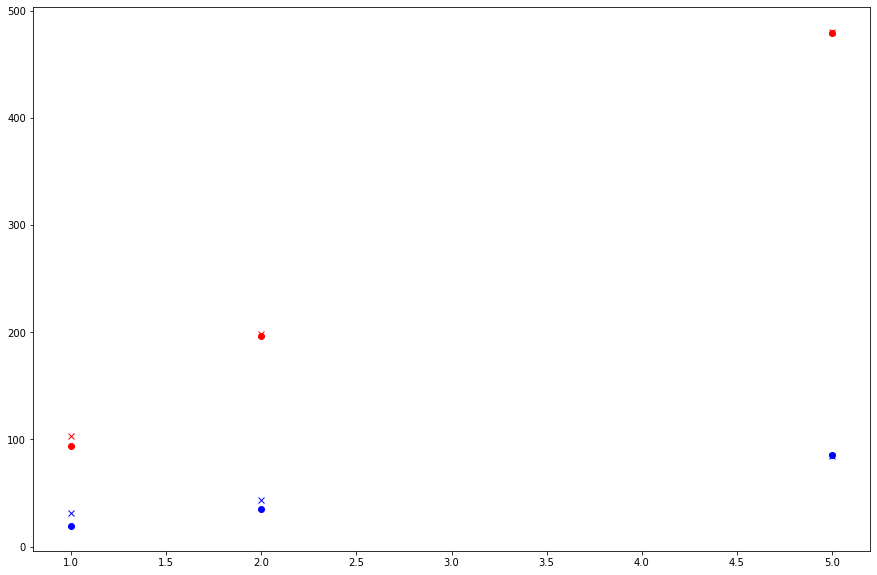

In [35]:

ts = [1, 2, 5]

escala = 2.1969
offset = 105.75

proms0 = np.array(proms0)
proms1 = np.array(proms1)
vars0 = np.array(vars0)
vars1 = np.array(vars1)

plt.figure(figsize=(15,10))
plt.plot(ts, escala*(proms0 - offset), 'ob')
plt.plot(ts, escala*(proms1 - offset), 'or')
plt.plot(ts, vars0, 'xb')
plt.plot(ts, vars1, "xr")
plt.show()


In [34]:


offsets = np.linspace(30, 130, 100)
escalas = np.linspace(0.5, 3.5, 100)

mediciones = np.zeros(shape=(100,100))

for ii, offset in enumerate(offsets):
    for jj, escala in enumerate(escalas):
        medicion0 = 0
        medicion1 = 0
        for j in range(3):
            medicion0 += abs(escala*(proms0[i] - offset) - vars0[i])
            medicion1 += abs(escala*(proms1[i] - offset) - vars1[i])
        mediciones[ii, jj] = medicion0 + medicion1

minimo = np.min(mediciones[:,:])
print(minimo, np.where(mediciones == minimo))
print(mediciones[75, 56])
print(offsets[75], escalas[56])

7.99935167614926 (array([75]), array([56]))
7.99935167614926
105.75757575757576 2.1969696969696972


offset= 105.75757575757576 escala= 2.1969696969696972


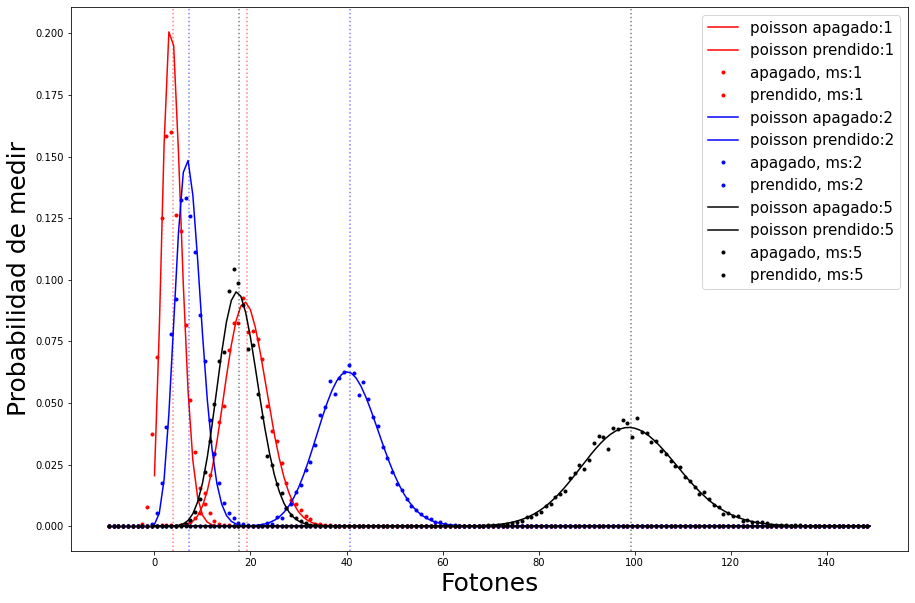

In [67]:
meds0 = np.array([cal1[:,0], cal2[:,0], cal5[:,0]])
meds1 = np.array([cal1[:,1], cal2[:,1], cal5[:,1]])

offset = offsets[75]
escala = escalas[56]

colores = ["r", "b", "k"]
tiempos = ["1", "2", "5"]

mus0 = []
mus1 = []

print("offset=",offset, "escala=",escala)
plt.figure(figsize=(15,10))
for i in range(len(meds0)):
    med0 = (meds0[i] - offset)/escala
    med1 = (meds1[i] - offset)/escala
    
    hist0, bin_edges0 = np.histogram(med0, bins=np.arange(-10,150,1,dtype=int), density=True)
    hist1, bin_edges1 = np.histogram(med1, bins=np.arange(-10,150,1,dtype=int), density=True)
    
    color = colores[i]
    tiempo = tiempos[i]
    
    x0 = bin_edges0[:-1]+0.5
    x1 = bin_edges1[:-1]+0.5
    
    prom0 = np.sum(x0*hist0)
    prom1 = np.sum(x1*hist1)
    
    mus0.append(prom0)
    mus1.append(prom1)
    
    x_pois = np.arange(0, 150, 1)
    
    y_pois0 = poisson.pmf(x_pois, prom0)
    y_pois1 = poisson.pmf(x_pois, prom1)
    
    plt.axvline(prom0, color=color, alpha=0.5, linestyle="dotted")
    plt.axvline(prom1, color=color, alpha=0.5, linestyle="dotted")
    plt.plot(x_pois, y_pois0, color=color,label="poisson apagado:"+tiempo)
    plt.plot(x_pois, y_pois1, color=color, label="poisson prendido:"+tiempo)
    plt.plot(x0, hist0, '.',color=color, label="apagado, ms:"+tiempo)
    plt.plot(x1 ,hist1, '.',color=color, label="prendido, ms:"+tiempo)
    
plt.xlabel("Fotones", fontsize=25)
plt.ylabel("Probabilidad de medir", fontsize=25)
plt.legend(fontsize=15)
plt.show()


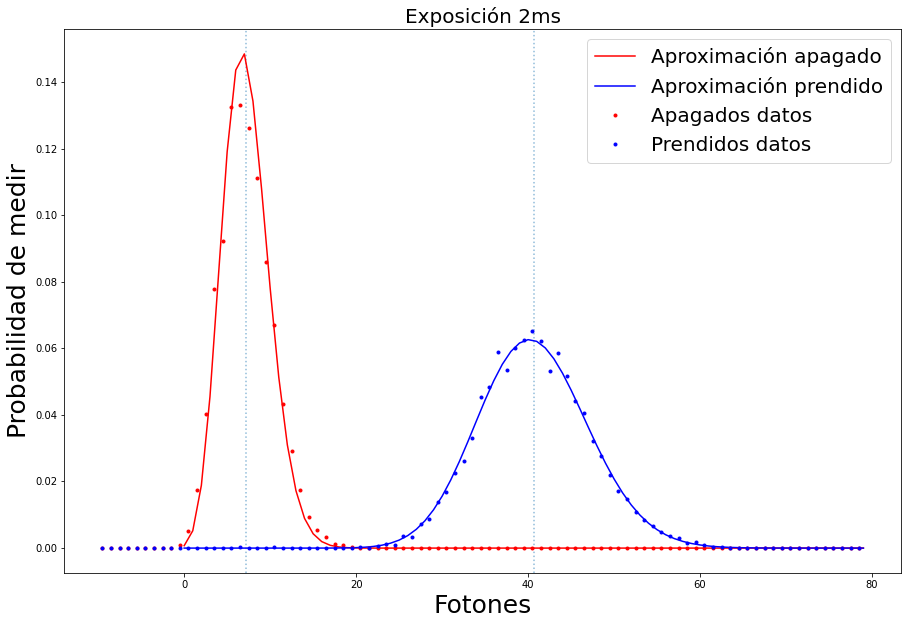

In [77]:
plt.figure(figsize=(15,10))
med0 = (cal2[:,0] - offset)/escala
med1 = (cal2[:,1] - offset)/escala

hist0, bin_edges0 = np.histogram(med0, bins=np.arange(-10,80,1,dtype=int), density=True)
hist1, bin_edges1 = np.histogram(med1, bins=np.arange(-10,80,1,dtype=int), density=True)

x0 = bin_edges0[:-1]+0.5
x1 = bin_edges1[:-1]+0.5

prom0 = np.sum(x0*hist0)
prom1 = np.sum(x1*hist1)

x_pois = np.arange(0, 80, 1)


y_pois0 = poisson.pmf(x_pois, prom0)
y_pois1 = poisson.pmf(x_pois, prom1)


plt.axvline(prom0, alpha=0.5, linestyle="dotted")
plt.axvline(prom1, alpha=0.5, linestyle="dotted")
plt.plot(x_pois, y_pois0, color = "r", label="Aproximación apagado")
plt.plot(x_pois, y_pois1, color="b", label="Aproximación prendido")
plt.plot(x0, hist0, '.', color = "r", label= "Apagados datos")
plt.plot(x1 ,hist1, '.', color = "b", label="Prendidos datos")

plt.xlabel("Fotones", fontsize=25)
plt.ylabel("Probabilidad de medir", fontsize=25)
plt.title("Exposición 2ms", fontsize=20)
plt.legend(fontsize=20)
plt.show()
